The files in this directory include:

regInterFullFiltered.html - A listing of all the interactions in the data in an HTML table.
 
coliInterFullVec.txt - All interactions in the dataset listed as a three column vector (operon number, transcription factor number, regulation type (1 activator, 2 repressor, 3 dual)).

coliInterNoAutoRegVec.txt - A binary (unsigned) version of coliInterFullVec only without autoregulation interactions.

coliInterFullNames.txt - A two column vector, the first column is a number, matching the number of the first two columns of the above interaction files, and the second column is the name of the operon.

RegulonDB data is of version 3.2 XML version with the unknown interactions, and the chip only interactions (00001) NOT included.
All other data collected by Shai Shen-Orr under the supervision of Dr. Uri Alon

There are 578 interactions in the matrix (519 with no autoregulation).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy
import sklearn
%matplotlib inline

In [2]:
#import table with names of genes
names = pd.read_table('colinet/coliInterFullNames.txt', sep=' ', header=None)
names.columns = ['id', 'gene']

#import table containing all interactions
full_vec = pd.read_table('colinet/coliInterFullVec.txt', sep=' ', header=None)
full_vec.columns = ['operon_number', 'transcription_number', 'regulation_type']
full_vec['regulation_type'] = full_vec['regulation_type'].replace([1, 2, 3], ['activator', 'repressor', 'dual'])

#merge the two tables on the indexes
df = names.merge(full_vec, left_index=True, right_index=True)

print(df.shape)
df.head()

(423, 5)


,id,gene,operon_number,transcription_number,regulation_type
0,1,aceBAK,3,4,repressor
1,2,acnA,6,6,dual
2,3,acrAB,11,6,activator
3,4,acrR,14,6,activator
4,5,acs,8,9,activator


In [3]:
#print the number of unique variables in each feature
for col in df:
    print('Unique '+ col + ' variables:', df[col].nunique())

Unique id variables: 423
Unique gene variables: 423
Unique operon_number variables: 272
Unique transcription_number variables: 87
Unique regulation_type variables: 3


In [4]:
#create a list of tuples between the operon and transcription numbers
tuples = [(x[2], x[3]) for x in df.values]

#create a blank network graph
G = nx.Graph()

#fill the network graph with the tuple list as edges
G.add_edges_from(tuples)

In [5]:
#add attributes to the nodes in the graph
for node in df['id']:
    if node in G.nodes():
        G.node[node]['Gene'] = df.loc[df['id']==node,'gene'].values[0]
        G.node[node]['Regulation Type'] = df.loc[df['id']==node,'regulation_type'].values[0]
        
print('Node 10: ', G.nodes[10])

Node 10:  {'Gene': 'ahpCF', 'Regulation Type': 'dual'}


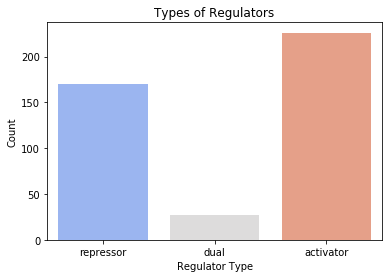

In [6]:
sns.countplot('regulation_type', data=df, palette='coolwarm')
plt.xlabel('Regulator Type')
plt.ylabel('Count')
plt.title('Types of Regulators')

plt.show()

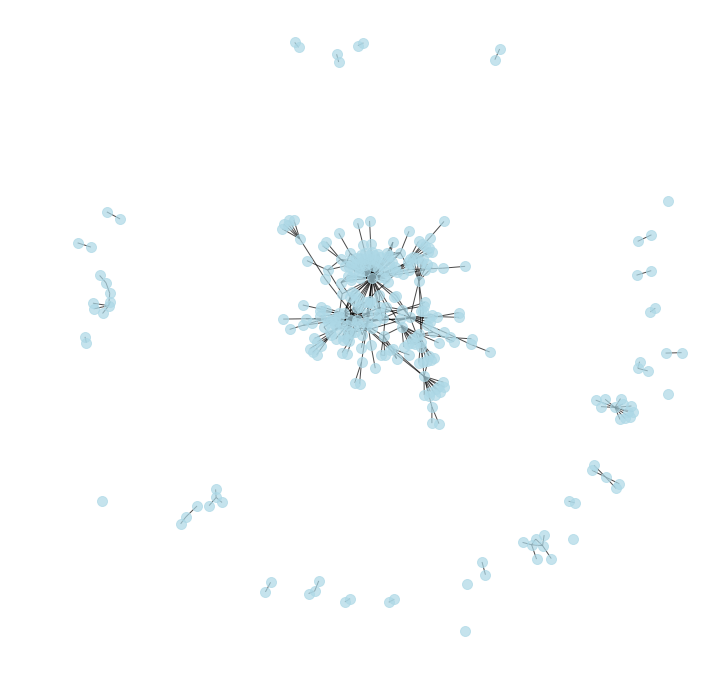

In [7]:
#draw the created graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), 
                 node_color='lightblue',
                 edge_color='black',
                 node_size=100,
                 with_labels=False,
                 alpha=.7
                 )
plt.axis('off')
plt.show()

In [8]:
numberofnodes=G.number_of_nodes()
node_dict = dict(G.degree())
nodedegrees=list(dict(G.degree()).values())
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
max_degree=max(nodedegrees)
clustering=list(nx.clustering(G).values())
betweenness_cent=list(nx.betweenness_centrality(G).values())
componentsizes=[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(numberofnodes,G.number_of_edges()))
print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))
print("A disease node with median degree is connected to {}% of other diseases.".format((med_degree/numberofnodes)*100))
print("The disease node with the maximum degree is connected to {}% of other diseases.".format((max_degree/numberofnodes)*100))
print("There are {} connected components within the graph.".format(nx.number_connected_components(G)))

This graph has 309 nodes and 423 edges.
The median degree is 1.0 and the mean degree is 2.737864077669903.
A disease node with median degree is connected to 0.3236245954692557% of other diseases.
The disease node with the maximum degree is connected to 23.948220064724918% of other diseases.
There are 31 connected components within the graph.


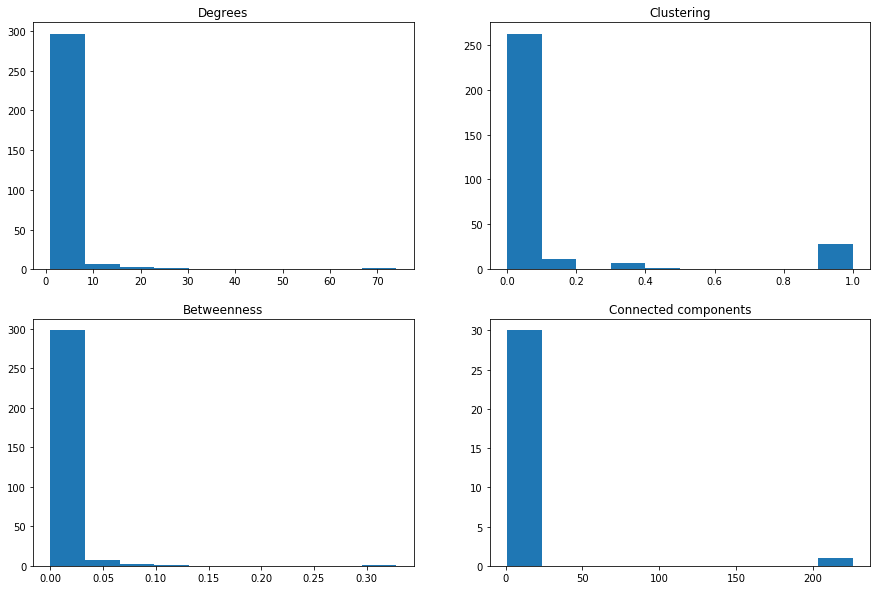

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.hist(nodedegrees)
plt.title('Degrees')

plt.subplot(222)
plt.hist(clustering)
plt.title('Clustering')

plt.subplot(223)
plt.hist(betweenness_cent)
plt.title('Betweenness')

plt.subplot(224)
plt.hist(componentsizes)
plt.title('Connected components')
plt.show()

In [10]:
node_list = []
for i, n in node_dict.items():
    if n > 2:
        node_list.append([i, n])

print(len(node_list))
sorted(node_list, key=lambda x: x[1], reverse=True)

83


[[66, 74],
 [143, 24],
 [190, 23],
 [24, 21],
 [137, 16],
 [227, 16],
 [282, 14],
 [222, 13],
 [274, 13],
 [64, 12],
 [154, 12],
 [136, 10],
 [193, 10],
 [30, 8],
 [20, 7],
 [237, 7],
 [77, 7],
 [82, 7],
 [148, 7],
 [292, 7],
 [241, 7],
 [56, 6],
 [270, 6],
 [251, 6],
 [252, 6],
 [298, 6],
 [304, 6],
 [144, 5],
 [157, 5],
 [169, 5],
 [290, 5],
 [114, 5],
 [119, 5],
 [267, 5],
 [6, 4],
 [1, 4],
 [49, 4],
 [172, 4],
 [285, 4],
 [357, 4],
 [5, 4],
 [151, 4],
 [233, 4],
 [246, 4],
 [369, 4],
 [68, 4],
 [291, 4],
 [123, 4],
 [197, 4],
 [175, 4],
 [229, 4],
 [258, 4],
 [18, 3],
 [165, 3],
 [202, 3],
 [351, 3],
 [43, 3],
 [57, 3],
 [86, 3],
 [87, 3],
 [118, 3],
 [240, 3],
 [287, 3],
 [318, 3],
 [345, 3],
 [382, 3],
 [74, 3],
 [88, 3],
 [94, 3],
 [203, 3],
 [127, 3],
 [200, 3],
 [272, 3],
 [273, 3],
 [7, 3],
 [160, 3],
 [162, 3],
 [181, 3],
 [188, 3],
 [92, 3],
 [278, 3],
 [294, 3],
 [207, 3]]

In [11]:
# Pulling our node-level statistics together into a dataframe.
graph_stats=pd.DataFrame({'node':list(dict(G.degree()).keys()),
                          'degree':list(dict(G.degree()).values()),
                          'clustering':list(nx.clustering(G).values()),
                          'betweenness_cent':list(nx.betweenness_centrality(G).values())
                         })

# Assigning each node to a component by number.
graph_stats['component']=None

# Sorting the components by size so that the largest component will be numbered 0.
components=sorted(nx.connected_components(G), key=len, reverse=True)
for i,component in enumerate(components):
    graph_stats.loc[graph_stats['node'].isin(list(component)),'component']=i
    
graph_stats.head()

,betweenness_cent,clustering,degree,node,component
0,0.000000,0.0,1,3,9
1,0.000000,0.0,1,4,9
2,0.004738,0.0,4,6,0
3,0.000000,0.0,1,11,0
4,0.009434,0.0,2,14,0


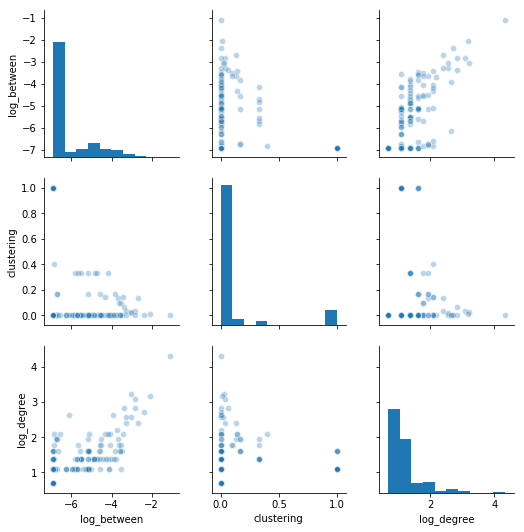

In [12]:
# Logging these two for easier relationship viewing.
graph_stats['log_between']=np.log(graph_stats['betweenness_cent']+.001)
graph_stats['log_degree']=np.log(graph_stats['degree']+1)

g = sns.pairplot(graph_stats,
                 vars=['log_between','clustering','log_degree'],
                 kind='scatter',
                plot_kws={'alpha':.3})
plt.show()